In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

1.0.1.post2
True


In [2]:
from torch import nn
import numpy as np
from torch import nn
from path import Path
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
import torch.nn.functional as F

In [3]:
import os
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [5]:
df=pd.DataFrame()
azz={}

In [6]:
def plot_roc(y_test,y_score,n_classes):
    
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    lb = LabelBinarizer()
    y_test=lb.fit_transform(y_test)
    
    y_test = np.hstack((1 - y_test, y_test))
    
#     y_test=lb.inverse_transform(y_test[:, 0])
#     print(y_test.shape)
#     print(y_test)    
#     print(y_test[:, 0])
#     print(y_score[:, 0])
#     print(y_score[:, 1])
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    plt.figure()
    lw = 2
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    azz['fpr']=fpr['macro']
    azz['tpr']=tpr['macro']

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    print(n_classes,"yes")
    for i, color in zip(range(n_classes), colors):
        print(i)
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('MLP  FOR  PROSTATE  DATASET')
    plt.legend(loc="lower right")
    plt.show()

In [7]:
seed=4
df=pd.read_csv("preprocessed_prostrate.csv")
no_of_rows,no_of_cols=df.shape
print (no_of_rows,no_of_cols)
df.head()

2424 106


,id_ref,gen_name,v1,v2,v3,v4,v5,v6,v7,v8,...,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104
0,Hs6-1-6-1,VHL,-0.009053,0.036120,-0.13310,0.08359,-0.3133,0.09471,-0.19860,0.1129,...,-0.1065,-0.19410,-0.109500,-0.16090,-2.267000e-01,-0.06939,-0.22780,-0.317900,-0.3523,-0.2771
1,Hs6-1-16-1,SMOX,0.000000,0.000000,0.00000,0.11160,0.0000,0.00000,0.00000,0.0000,...,0.0000,0.00000,0.000000,0.17460,-5.180000e-10,0.00000,0.00000,0.000000,-0.3898,-0.1275
2,Hs6-1-6-2,ZNF148,0.189100,-0.175300,0.20240,0.05745,-0.5522,-0.04709,-0.19840,-0.2156,...,0.1284,-0.18470,0.007602,0.02113,4.399000e-01,-0.06516,0.01167,0.304800,0.3409,-0.1266
3,Hs6-1-10-2,MAP4K2,0.335300,0.145700,0.02996,-0.03641,-0.2931,0.23760,-0.01799,0.1953,...,0.3081,-0.25550,0.255800,-0.08655,3.707000e-02,0.03404,0.13550,-0.008265,0.1549,0.4213
4,Hs6-1-15-2,MAPK4,0.310600,0.008775,0.51170,-0.05886,-0.5037,0.36220,0.24620,0.4525,...,0.3401,-0.04517,0.493200,-0.22720,-1.430000e-01,0.26500,0.14160,0.334100,0.3155,0.5046


In [8]:
header_of_pd=['v'+str(i+1) for i in range(no_of_cols-2)]
X=np.array(df[header_of_pd])
print(X.shape)

(2424, 104)


In [9]:
fil=open('Labels_prostate.txt','r')
tmp=list()
for line in fil:
	tmp.append(int(line))

Y=np.array(tmp)


In [10]:
augmented_X=[]
augmented_Y=[]
a=0
b=0
c=0
d=0
choice=0
t=0
for i in Y:
    if i==0:
        
        choice=1
        a=a+choice
    elif i==1:
        choice=1
        b=b+choice
    for u in range(choice):
        augmented_X.append(X[t])
        augmented_Y.append(Y[t])
    t=t+1
    
print(a,b)
augmented_X=np.array(augmented_X)
augmented_Y=np.array(augmented_Y)

1170 1254


In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(augmented_X,augmented_Y,test_size=0.20,random_state=2)
print(X_test.shape)

(485, 104)


In [12]:
class Net(torch.nn.Module):
    def __init__(self, n_feature,out_features):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature,900)
        self.hidden2 = torch.nn.Linear(900,600)
        self.hidden3 = torch.nn.Linear(600,400)
        self.hidden4 = torch.nn.Linear(400,100)
        self.hidden5 =torch.nn.Linear (100,10)
        self.predict = torch.nn.Linear(10,out_features)
        self.bn1 = nn.BatchNorm1d(num_features=900)
        self.bn2 = nn.BatchNorm1d(num_features=600)
        self.bn3 = nn.BatchNorm1d(num_features=400)
        self.bn4 = nn.BatchNorm1d(num_features=100)
        self.bn5 = nn.BatchNorm1d(num_features=10)
    def forward(self, x):
        x = F.relu(self.hidden1(x))
#         x=self.bn1(x)
        x = F.relu(self.hidden2(x))
#         x=self.bn2(x)
        x =F.relu(self.hidden3(x))
        x=self.bn3(x)
        x =F.relu(self.hidden4(x))
        x=self.bn4(x)
        x =F.relu(self.hidden5(x))
#         x=self.bn5(x)
        
        x=F.relu(self.predict(x))
        return x

In [13]:
MP=Net(104,2)
MP.eval()
MP.load_state_dict(torch.load(Path('80MLP_prostate.pt')))
total = X_test.shape[0]
x_test=torch.tensor(X_test,dtype=torch.float)
y_test=torch.tensor(Y_test,dtype=torch.long)
outputs = MP(x_test)
_, predicted = torch.max(outputs.data, 1)
correct = (predicted.cpu() == y_test).sum()
confusion_matrix = torch.zeros(2, 2)
print('Accuracy of the network on the test data: %d %%' % (100 * correct / total))
for t, p in zip(y_test.view(-1), predicted.view(-1)):
 confusion_matrix[t.long(), p.long()] += 1
print(confusion_matrix)



Accuracy of the network on the test data: 83 %
tensor([[218.,  33.],
        [ 48., 186.]])


In [14]:
print(outputs.shape,y_test.shape)

torch.Size([485, 2]) torch.Size([485])


2 yes
0
1


<Figure size 432x288 with 0 Axes>

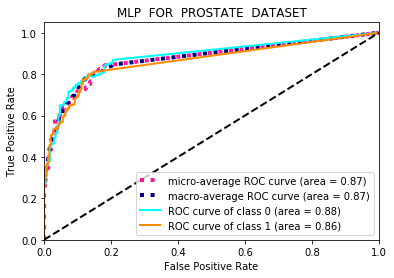

In [15]:
plot_roc(y_test.numpy(),outputs.detach().numpy(),2)

In [16]:
 
dataset = pd.DataFrame({'fpr':azz['fpr'],'tpr':azz['tpr']})

In [17]:
dataset.to_csv('prostrate_mlp_roc.csv')